<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: test samplingXY </font>
</div>

- **Fecha**: 2023/03/28
        
- **Objetivos**: 2D convolution Kriging 
- **Descripción** Test for working samplingXY in utils_math.

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 75
rcParams['lines.markersize']=10
rcParams['image.cmap']='hot'


# Theoretical variogram 



In [4]:
import ipywidgets as widgets

In [61]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical
#from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.standard_2D import kriging2D
from phyton_kriging.convolution_2D import Convolution_2D

from phyton_kriging.utils_math import nearest2, nearest

## Variograma 1D

In [62]:
h = np.linspace(0, 10, 1000)

name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.010000000000000002, max - 1.0080695458637723
parameters = {'sc': 0.1, 'A': 1, 'lc': 4, 'power': None}



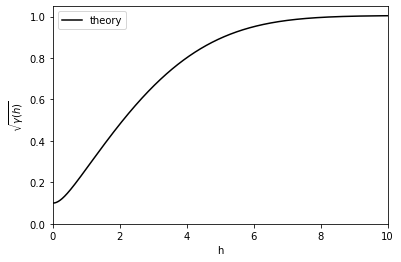

In [63]:
sc = 0.1
I0 = .00001

# var_theo = theoretical(h=h, make_2D=False)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=4)
var_theo.draw()
print(var_theo)

In [64]:
def f_signal(x, y, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    z = np.exp(-(x**2+y**2)/(2*5**2))
    z = x+y
    z = np.sin(2 * np.pi * x / 10) * np.sin(2 * np.pi * y / 10)+x/20
    z = z + sc * np.random.randn(num_sensors)
    z = z + 2 * I0 * (np.random.rand(num_sensors) - 0.5)

    return z

In [65]:
num_x = num_y = 9
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
y = -10 + 20 * np.random.rand(num_sensors)

x = np.linspace(-10, 10, num_x)
y = np.linspace(-10, 10, num_y)

X,Y=np.meshgrid(x,y)
x = X.flatten()
y= Y.flatten()


sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x,y,sc,I0)
sensors[:, 3] = sc * np.ones_like(x)

sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)


In [66]:
num_sampling = 40**2
num_x = num_y = int(np.sqrt(num_sampling))
x_sampling = np.linspace(-10, 10, num_x)
y_sampling = np.linspace(-10, 10, num_y)
sampling2D=(x_sampling, y_sampling)

X_sampling, Y_sampling = np.meshgrid(x_sampling,y_sampling)
z_ideal_sampling = f_signal(X_sampling, Y_sampling, 0, 0)
Sampling2D = (X_sampling, Y_sampling)

In [67]:
krig2 = Convolution_2D(sensors=sensors,
                       variogram=var_theo,
                       sampling=sampling2D,
                       y_ideal=z_ideal_sampling)


40 40


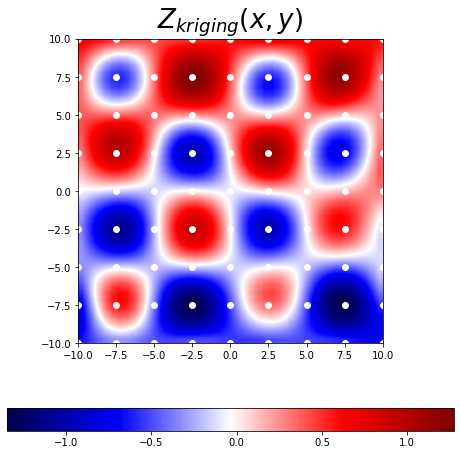

In [68]:
krig2.draw('kriging')

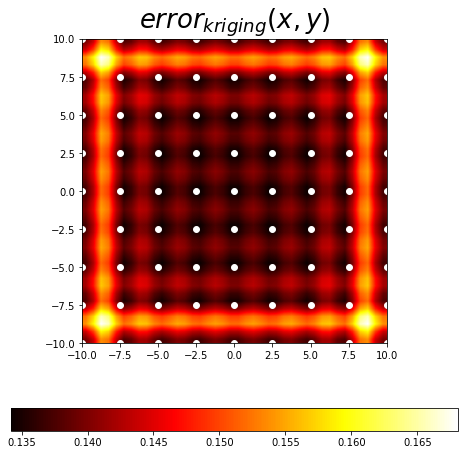

In [69]:
krig2.draw('error_kriging')

In [95]:
krig2.compute_estimation_convolution(sensors)


ValueError: volume and kernel should have the same dimensionality

In [100]:
print(krig2.DM.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [101]:
krig2.compute_DM()

In [102]:
krig2.compute_error_convolution()


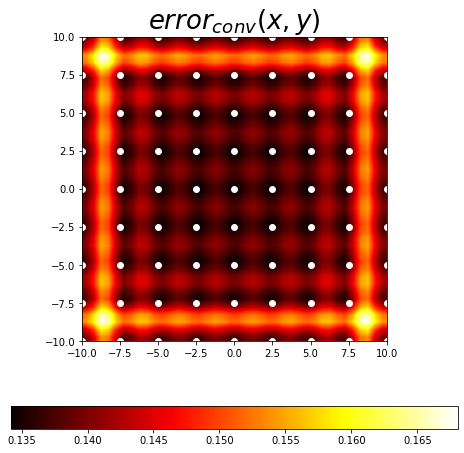

In [103]:
krig2.draw('error_convolution')

In [74]:
x_sampling = np.unique(X_sampling)
x_sampling.sort()

print(x_sampling.shape)

(40,)


In [86]:
X_sampling, Y_sampling = Sampling2D

x_sampling = np.unique(X_sampling)
y_sampling = np.unique(Y_sampling)

x_sampling.sort()
y_sampling.sort()

xyComb = np.zeros(X_sampling.shape)
zComb = np.zeros(X_sampling.shape)


imenores_x, _, _ = nearest2(x_sampling, sensors[:, 0])

jmenores_y, _, _ = nearest2(y_sampling, sensors[:, 1])

for k in range(len(sensors[:, 0])):
    i = imenores_x[k]
    j = jmenores_y[k]
    xyComb[i, j] = xyComb[i, j] + 1
    zComb[i, j] = sensors[k, 2]


(40,) (40,)
(40, 40)
[ 0  0  0  0  0  0  0  0  0  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10
 10 10 10 15 15 15 15 15 15 15 15 15 20 20 20 20 20 20 20 20 20 24 24 24
 24 24 24 24 24 24 29 29 29 29 29 29 29 29 29 34 34 34 34 34 34 34 34 34
 39 39 39 39 39 39 39 39 39]


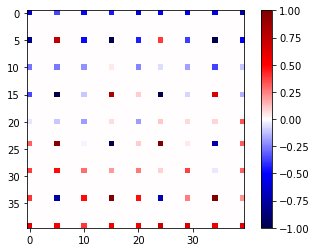

In [92]:
plt.imshow(zComb)
plt.set_cmap('seismic')
plt.colorbar()
plt.clim(-1,1)

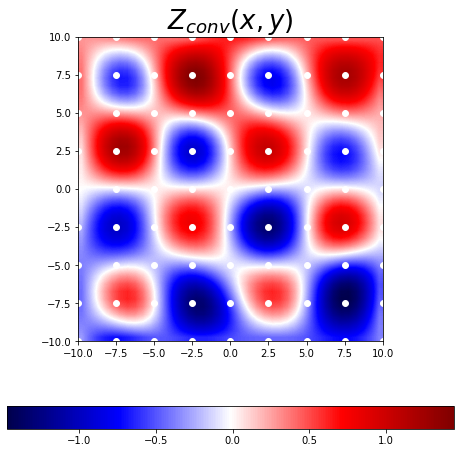

In [ ]:
krig2.draw('convolution')

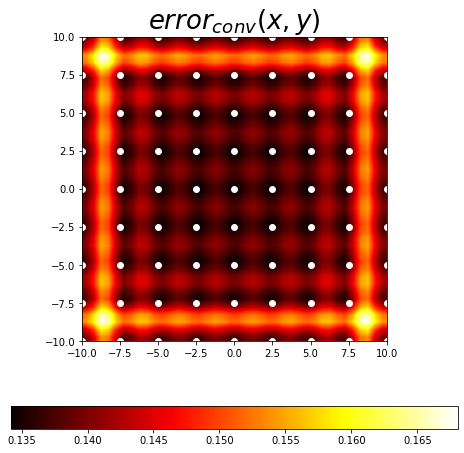

In [ ]:
krig2.draw('error_convolution')

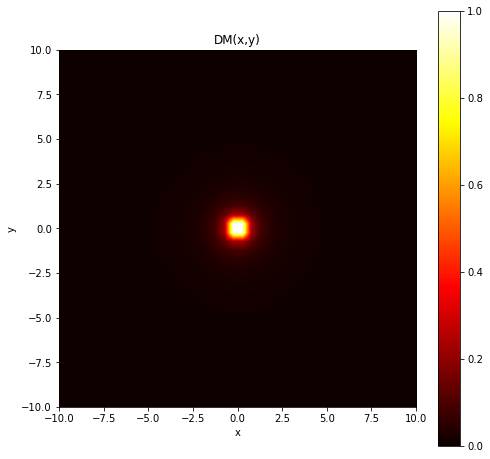

In [ ]:
krig2.draw('DM')

In [58]:
krig2.draw('NEQ')

con funcion samplingXY que está sin desarrollar

SyntaxError: invalid syntax (2320406035.py, line 3)

In [ ]:
krig1.draw('Lambda')

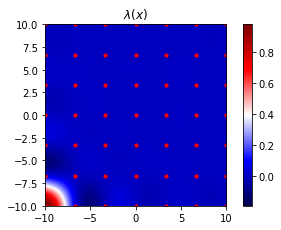

interactive(children=(IntSlider(value=24, description='i', max=48), Output()), _dom_classes=('widget-interact'…

In [59]:
krig1.draw('lambdas')

In [ ]:
krig1.draw('lambdas_centered')

In [ ]:
X, lambda_mean, LAMBDAS = krig1.center_lambdas()

plt.plot(X, LAMBDAS)
plt.plot(X, lambda_mean,'k', lw=2)

AttributeError: 'kriging2D' object has no attribute 'center_lambdas'